In [1]:
#Importing the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the csv as a dataframe
data = pd.read_csv('df_no_duplicates.csv')
print(data)

       Year of Birth  Gender           Ethnicity Child's First Name  Count  \
0               2011  Female            Hispanic          Geraldine     13   
1               2011  Female            Hispanic                Gia     21   
2               2011  Female            Hispanic             Gianna     49   
3               2011  Female            Hispanic            Giselle     38   
4               2011  Female            Hispanic              Grace     36   
...              ...     ...                 ...                ...    ...   
18048           2018  Female  Black non hispanic               Nala     10   
18049           2018  Female  Black non hispanic            Royalty     10   
18050           2018  Female  Black non hispanic            Sariyah     10   
18051           2018  Female  Black non hispanic             Simone     10   
18052           2018  Female  Black non hispanic              Zahra     10   

       Rank  
0        75  
1        67  
2        42  
3      

In [5]:
# Grouping data by 'Year of Birth', 'Ethnicity', 'Gender', and finding the lowest rank for each group
lowest_ranks = data.groupby(['Year of Birth', 'Ethnicity', 'Gender'])['Rank'].idxmin()

# Getting the names corresponding to the lowest ranks
most_popular_names = data.loc[lowest_ranks][['Year of Birth', 'Ethnicity', 'Gender', "Child's First Name", 'Rank']]
most_popular_names

,Year of Birth,Ethnicity,Gender,Child's First Name,Rank
1085,2011,Asian and pacific islanders,Female,Sophia,1
598,2011,Asian and pacific islanders,Male,Ethan,1
1210,2011,Black non hispanic,Female,Madison,1
793,2011,Black non hispanic,Male,Jayden,1
22,2011,Hispanic,Female,Isabella,1
...,...,...,...,...,...
15769,2019,Black non hispanic,Male,Noah,1
14438,2019,Hispanic,Female,Isabella,1
14174,2019,Hispanic,Male,Liam,1
15386,2019,White non hispanic,Female,Chaya,1


In [7]:
# Save the DataFrame without duplicates to a CSV file
most_popular_names.to_csv('most_pnames.csv', index=False)

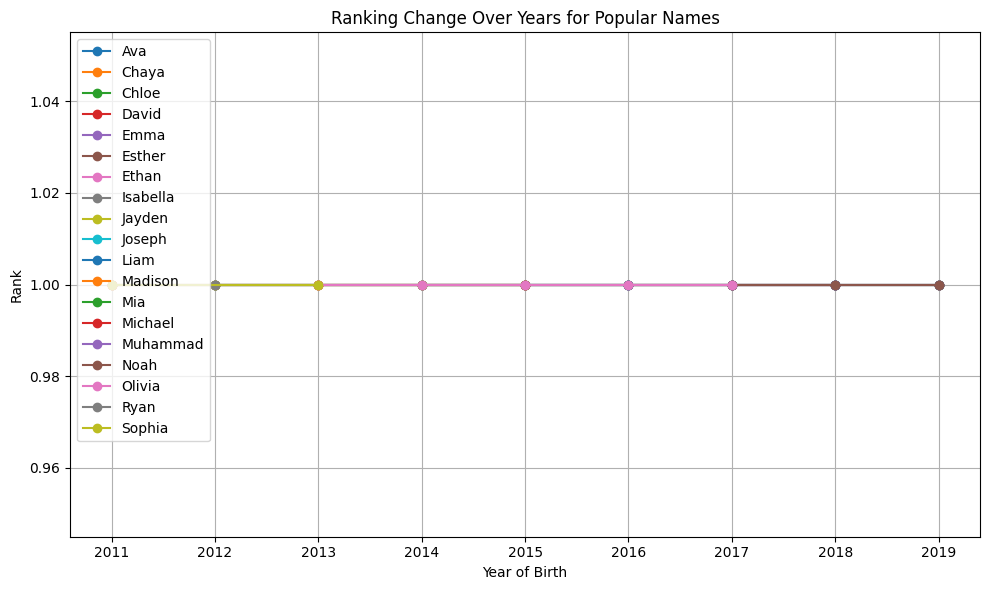

In [8]:
# Grouping the most_popular_names DataFrame by 'Child's First Name' and 'Year of Birth' to track the rank change over years
grouped_data = most_popular_names.groupby(["Child's First Name", 'Year of Birth']).min().reset_index()

# Plotting the change in rankings over years for each popular name
plt.figure(figsize=(10, 6))

# Iterate through each name to plot its rank change over the years
for name in grouped_data["Child's First Name"].unique():
    name_data = grouped_data[grouped_data["Child's First Name"] == name]
    plt.plot(name_data['Year of Birth'], name_data['Rank'], marker='o', label=name)

plt.xlabel('Year of Birth')
plt.ylabel('Rank')
plt.title('Ranking Change Over Years for Popular Names')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

i need to get the plot, for rank 1 for all years, then the plot to undertsand how the ranking has changed in the same gender and ethnicity.

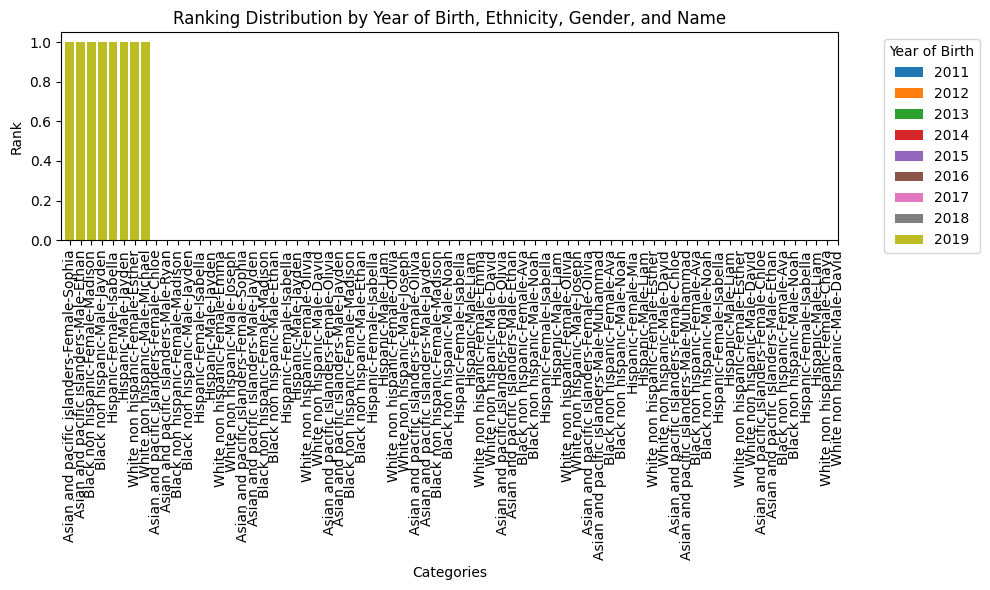

In [10]:
# Grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through unique values of 'Year of Birth' and create grouped bars
for year in most_popular_names['Year of Birth'].unique():
    sub_df = most_popular_names[most_popular_names['Year of Birth'] == year]
    x = range(len(sub_df))
    ax.bar(x, sub_df['Rank'], label=str(year))

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('Rank')
ax.set_title('Ranking Distribution by Year of Birth, Ethnicity, Gender, and Name')
ax.set_xticks(range(len(most_popular_names)))
ax.set_xticklabels([f"{eth}-{gen}-{name}" for eth, gen, name in zip(most_popular_names['Ethnicity'], most_popular_names['Gender'], most_popular_names["Child's First Name"])])
plt.xticks(rotation=90)
ax.legend(title='Year of Birth', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

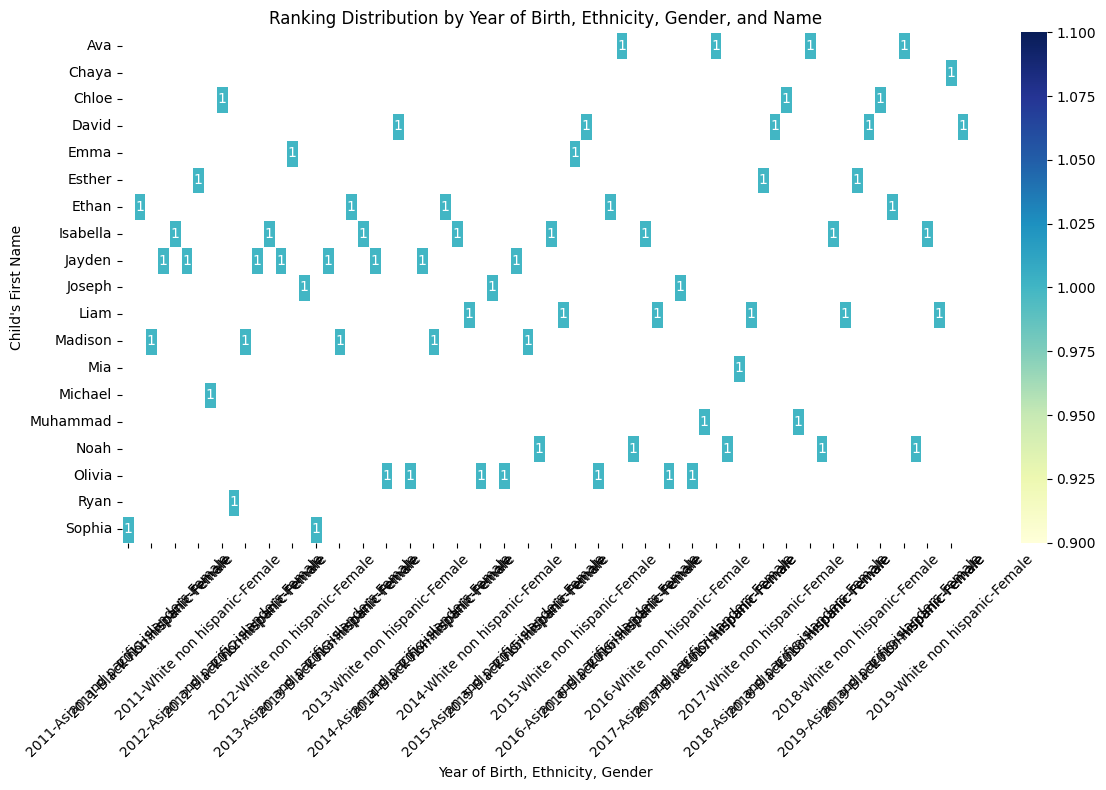

In [11]:
# Pivot the data to prepare for the heatmap
pivot_df = most_popular_names.pivot_table(index=["Child's First Name"], columns=['Year of Birth', 'Ethnicity', 'Gender'], values='Rank')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Ranking Distribution by Year of Birth, Ethnicity, Gender, and Name')
plt.xlabel('Year of Birth, Ethnicity, Gender')
plt.ylabel('Child\'s First Name')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

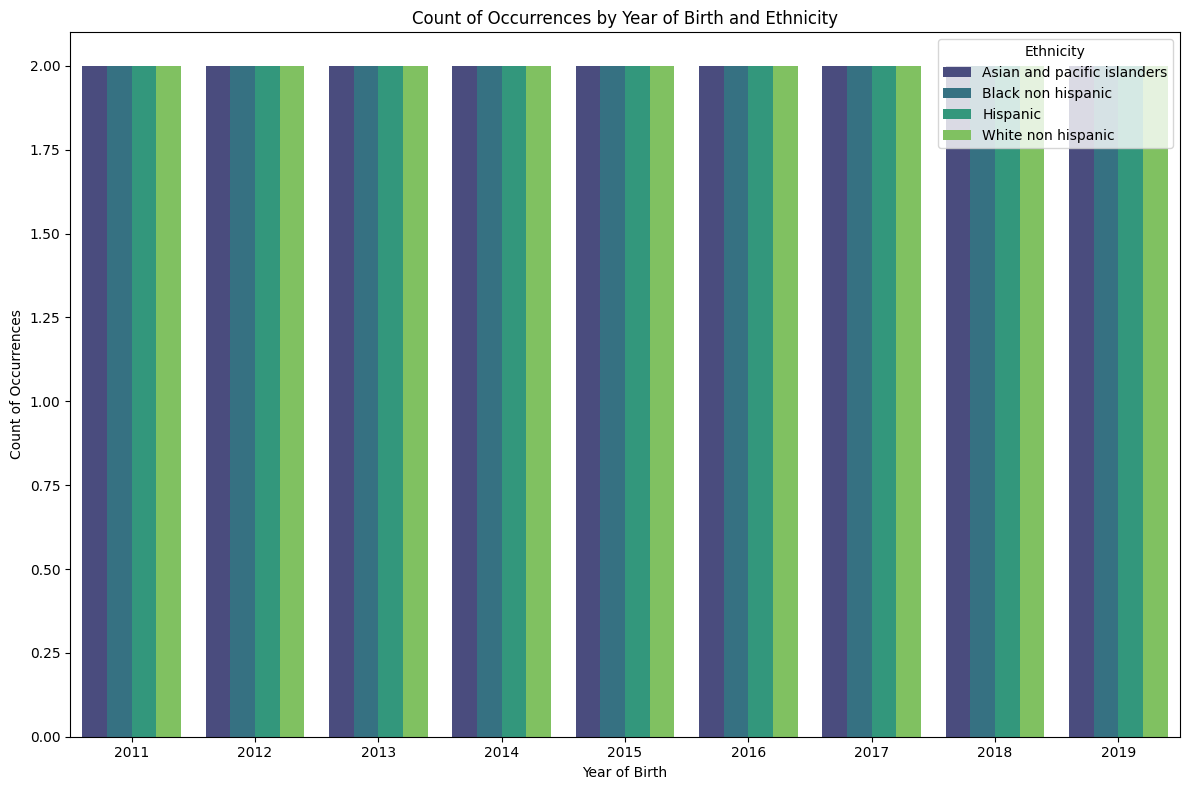

In [12]:
# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(
    data=most_popular_names,
    x='Year of Birth',
    hue='Ethnicity',
    palette='viridis'
)
plt.title('Count of Occurrences by Year of Birth and Ethnicity')
plt.xlabel('Year of Birth')
plt.ylabel('Count of Occurrences')
plt.legend(title='Ethnicity', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

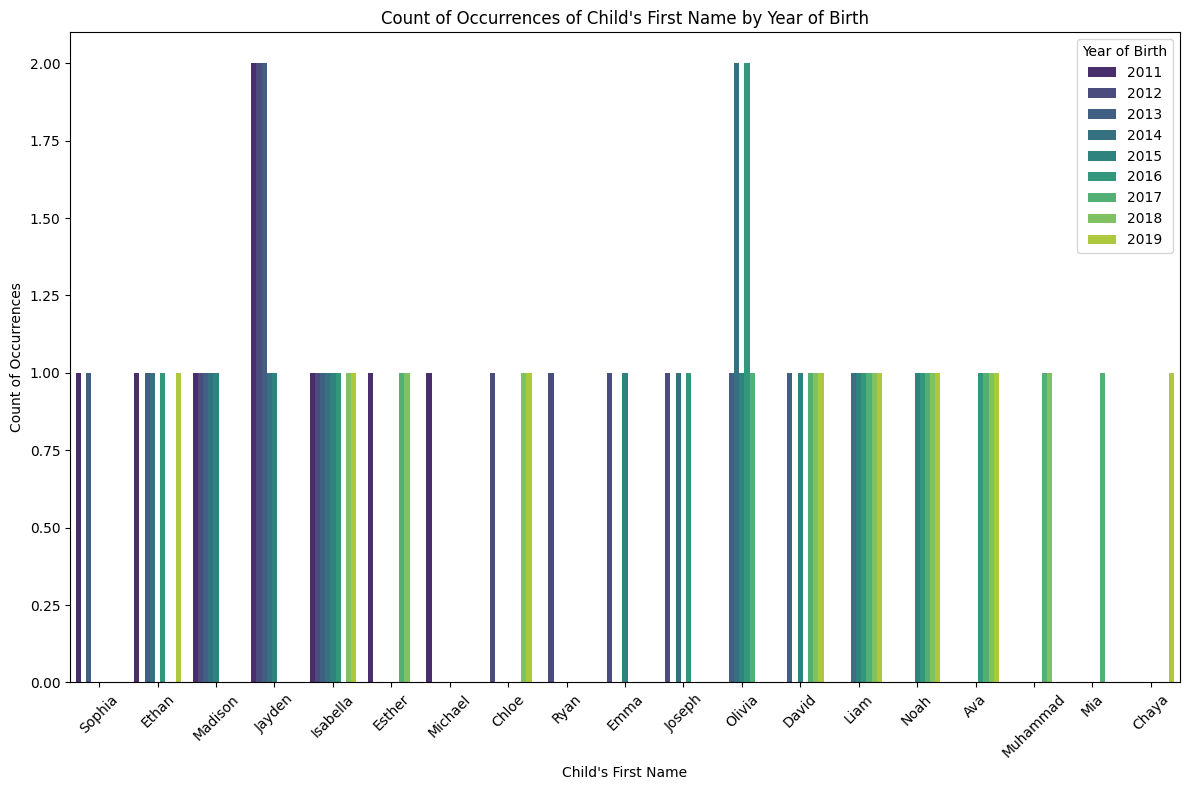

In [14]:
# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(
    data=most_popular_names,
    x="Child's First Name",
    hue='Year of Birth',
    palette='viridis'
)
plt.title('Count of Occurrences of Child\'s First Name by Year of Birth')
plt.xlabel("Child's First Name")
plt.ylabel('Count of Occurrences')
plt.legend(title='Year of Birth', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samyu\AppData\Local\Temp\ipykernel_21916\1982258879.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


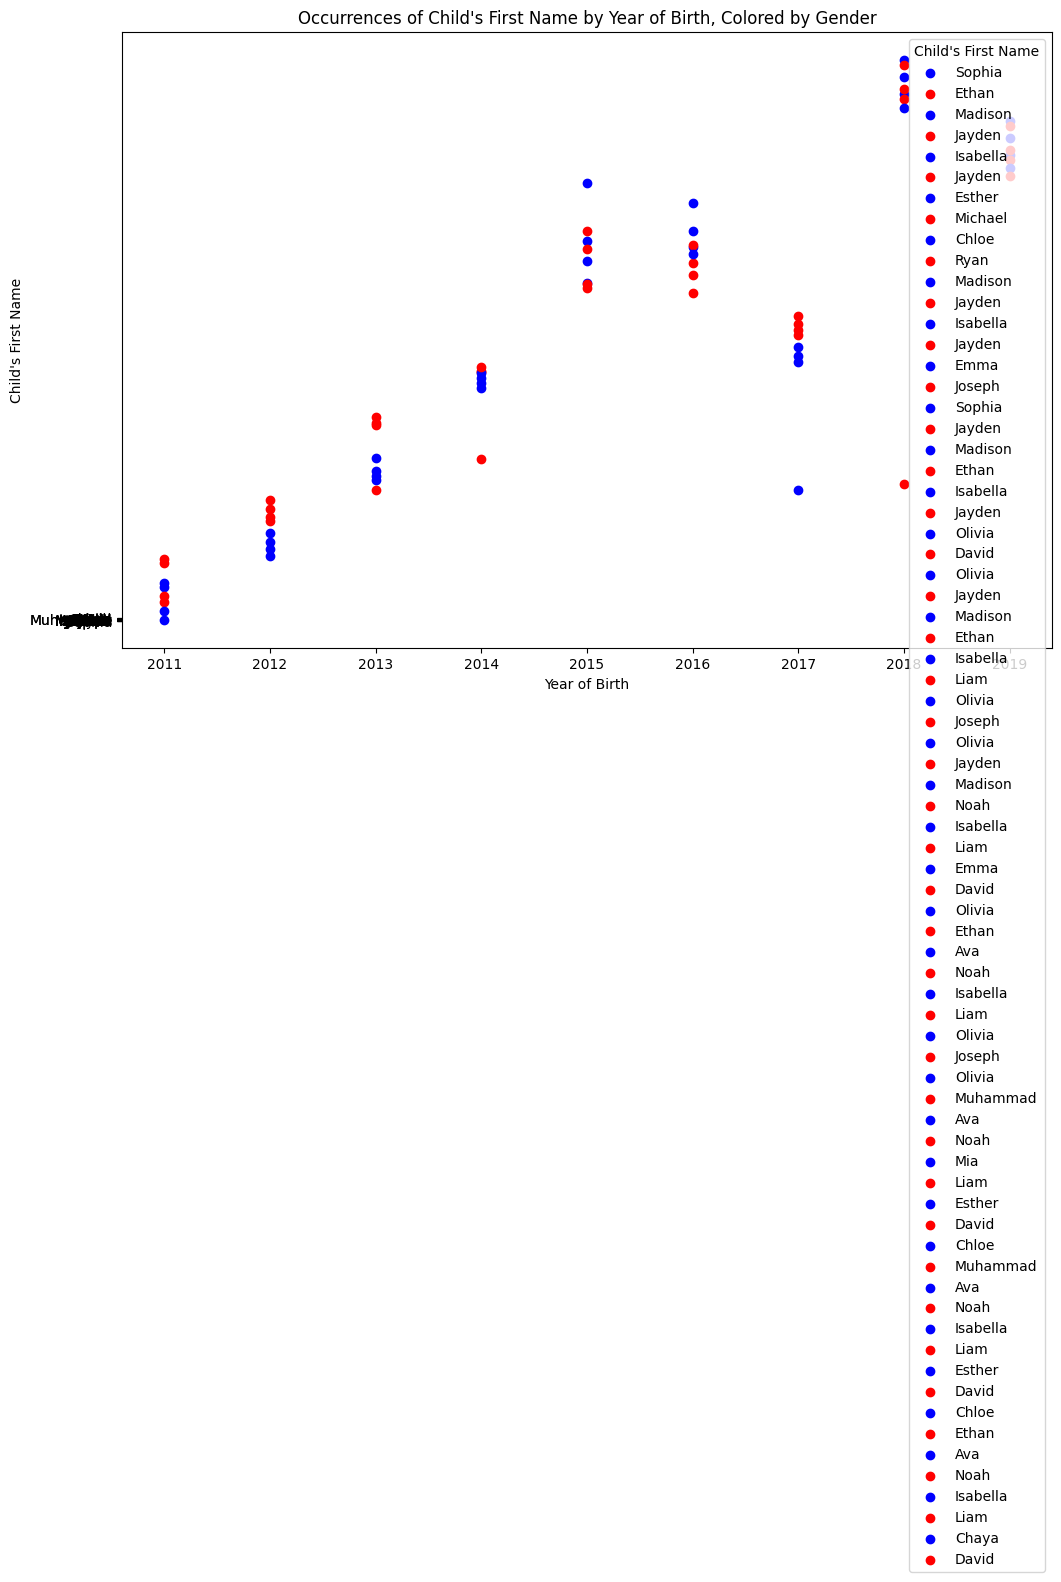

In [16]:
# Plotting scatter plot
plt.figure(figsize=(12, 8))
for i, row in most_popular_names.iterrows():
    plt.scatter(
        row['Year of Birth'],  # X-axis: Year of Birth
        i,                      # Y-axis: Index for each row
        color='blue' if row['Gender'] == 'Female' else 'red',  # Color by gender
        label=row["Child's First Name"]
    )

plt.yticks(range(len(most_popular_names)), most_popular_names["Child's First Name"])
plt.xlabel('Year of Birth')
plt.ylabel("Child's First Name")
plt.title('Occurrences of Child\'s First Name by Year of Birth, Colored by Gender')
plt.legend(title="Child's First Name")
plt.tight_layout()
plt.show()

C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

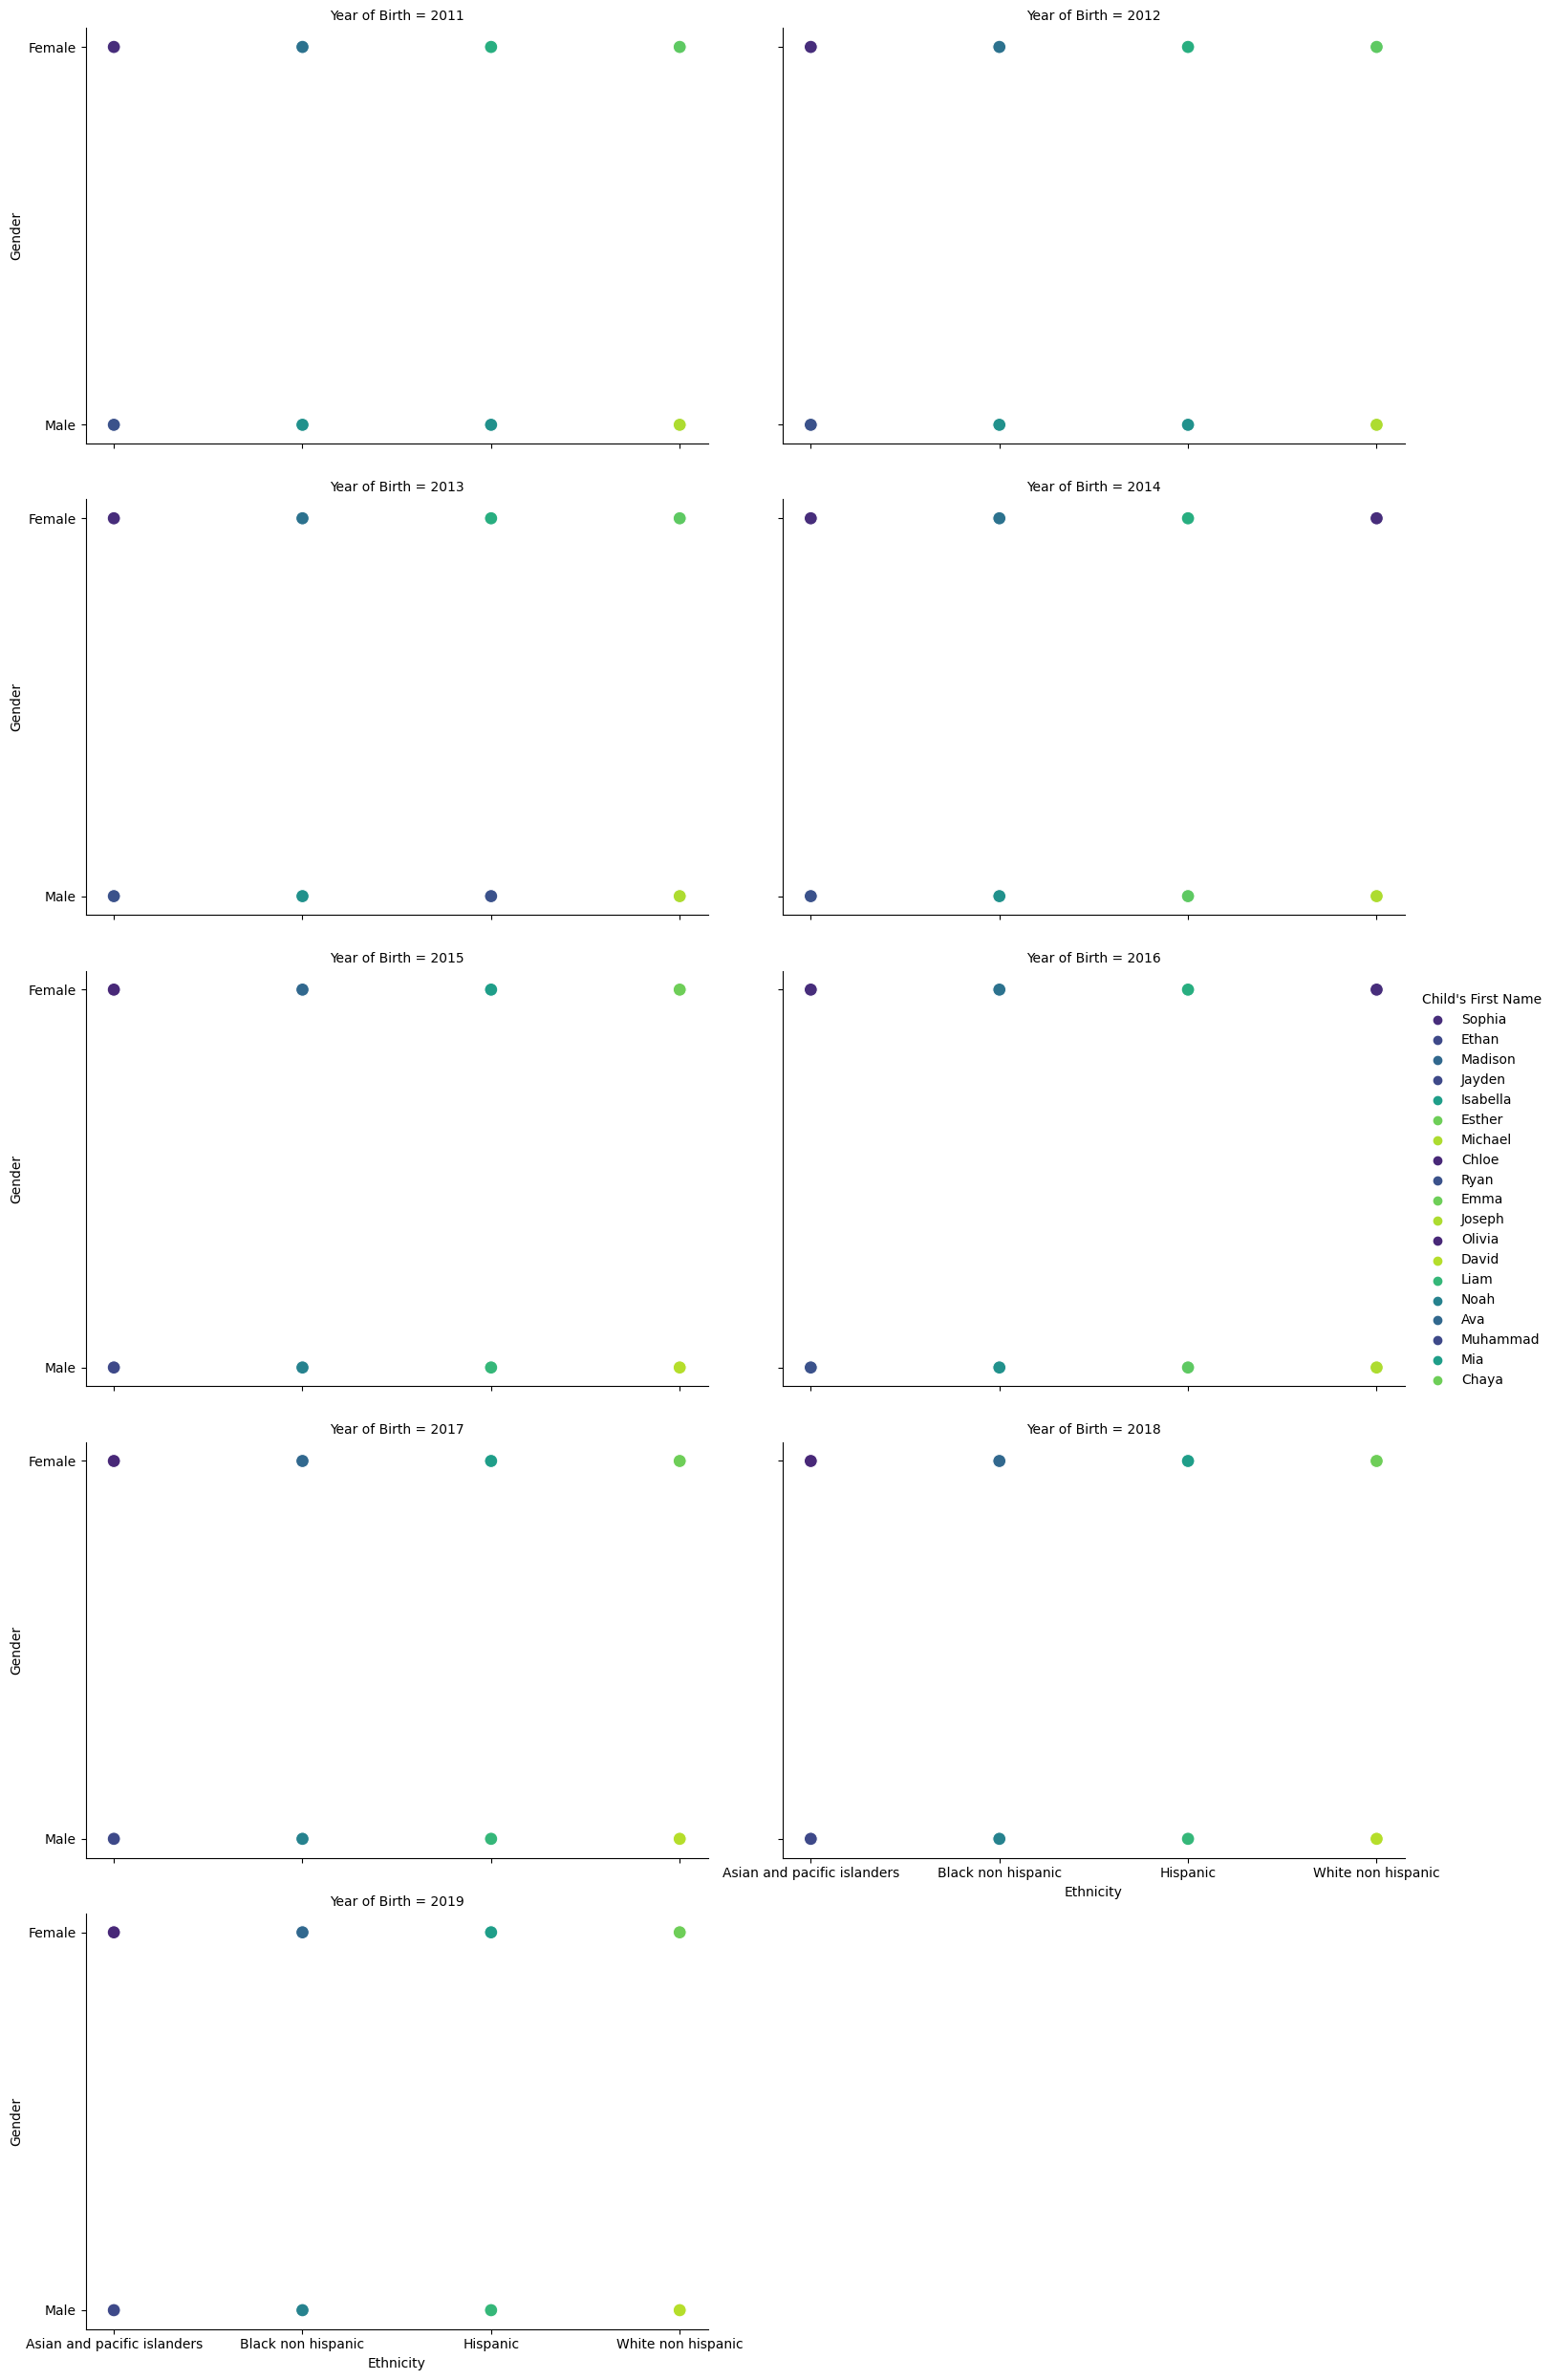

In [18]:
# Creating plots
g = sns.FacetGrid(most_popular_names, col='Year of Birth', col_wrap=2, height=5, aspect=1.5)
g.map(sns.scatterplot, 'Ethnicity', 'Gender', "Child's First Name", palette='viridis', s=100)
g.set_axis_labels('Ethnicity', 'Gender')
g.add_legend(title="Child's First Name")
plt.show()

C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

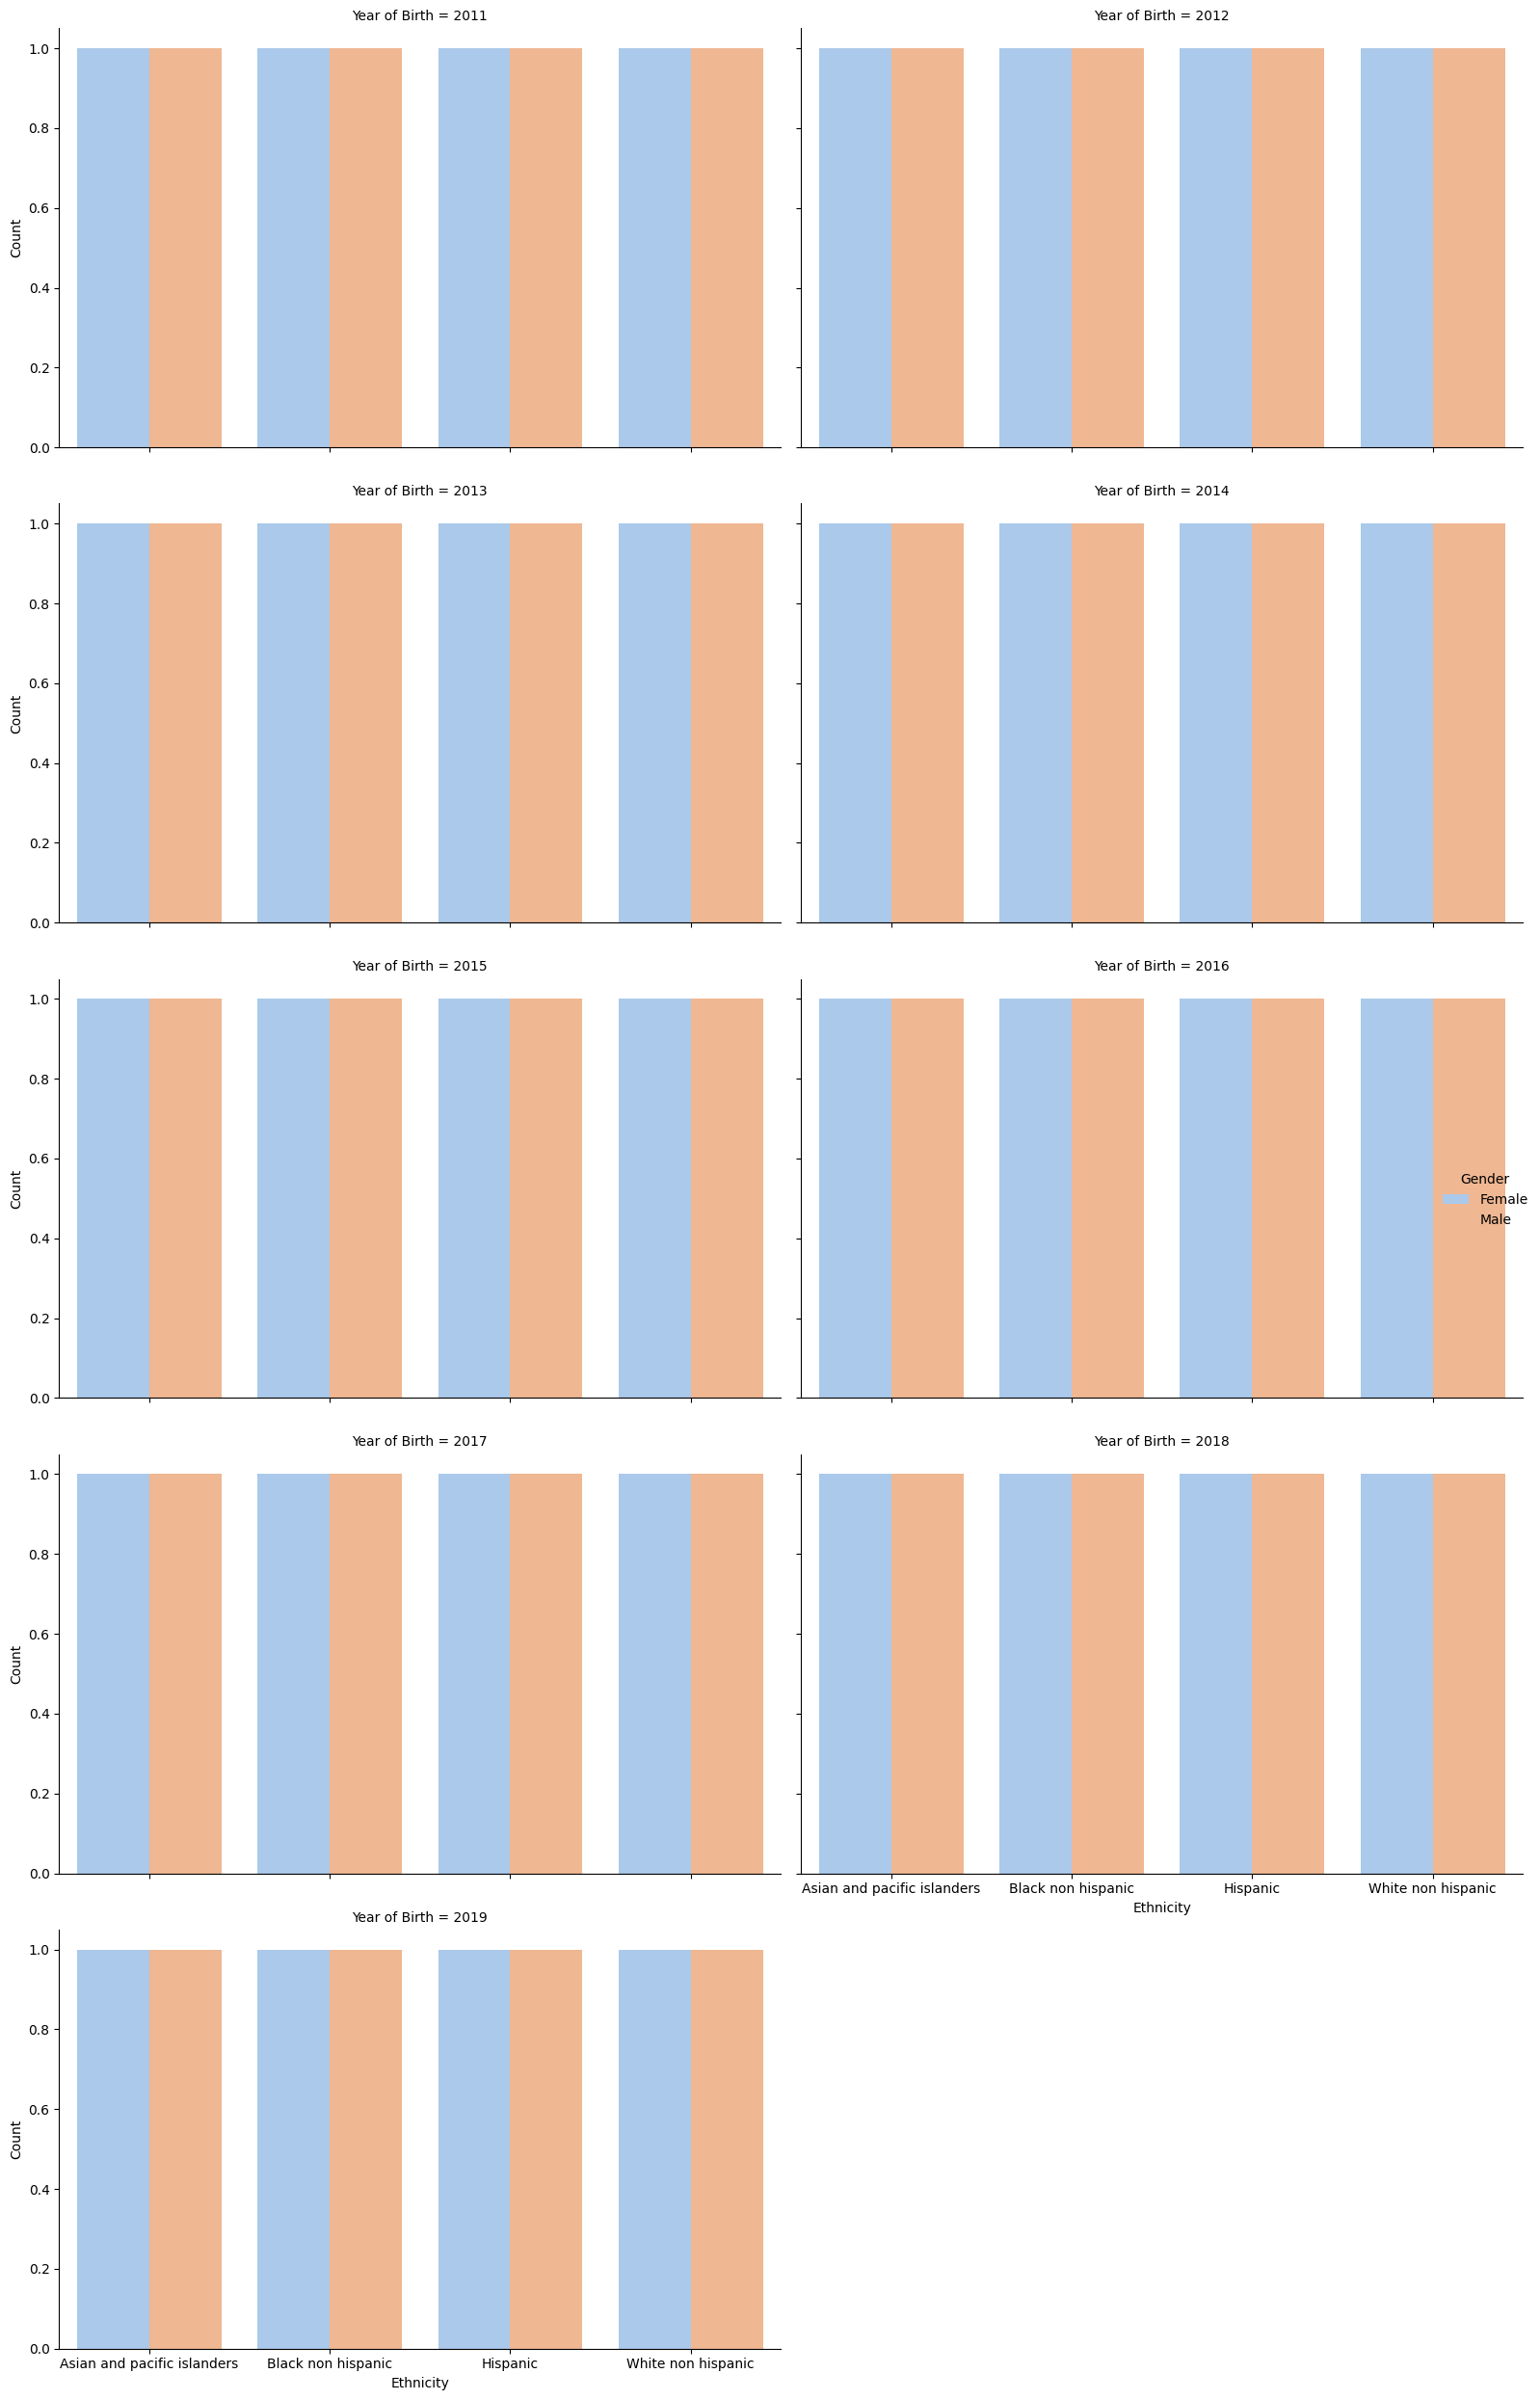

In [19]:
# Creating bar plot with FacetGrid
g = sns.FacetGrid(most_popular_names, col='Year of Birth', col_wrap=2, height=5, aspect=1.5)
g.map_dataframe(sns.countplot, x='Ethnicity', hue='Gender', palette='pastel', dodge=True)
g.set_axis_labels('Ethnicity', 'Count')
g.add_legend(title='Gender')
plt.tight_layout()
plt.show()

C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samyu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

TypeError: Neither the `x` nor `y` variable appears to be numeric.

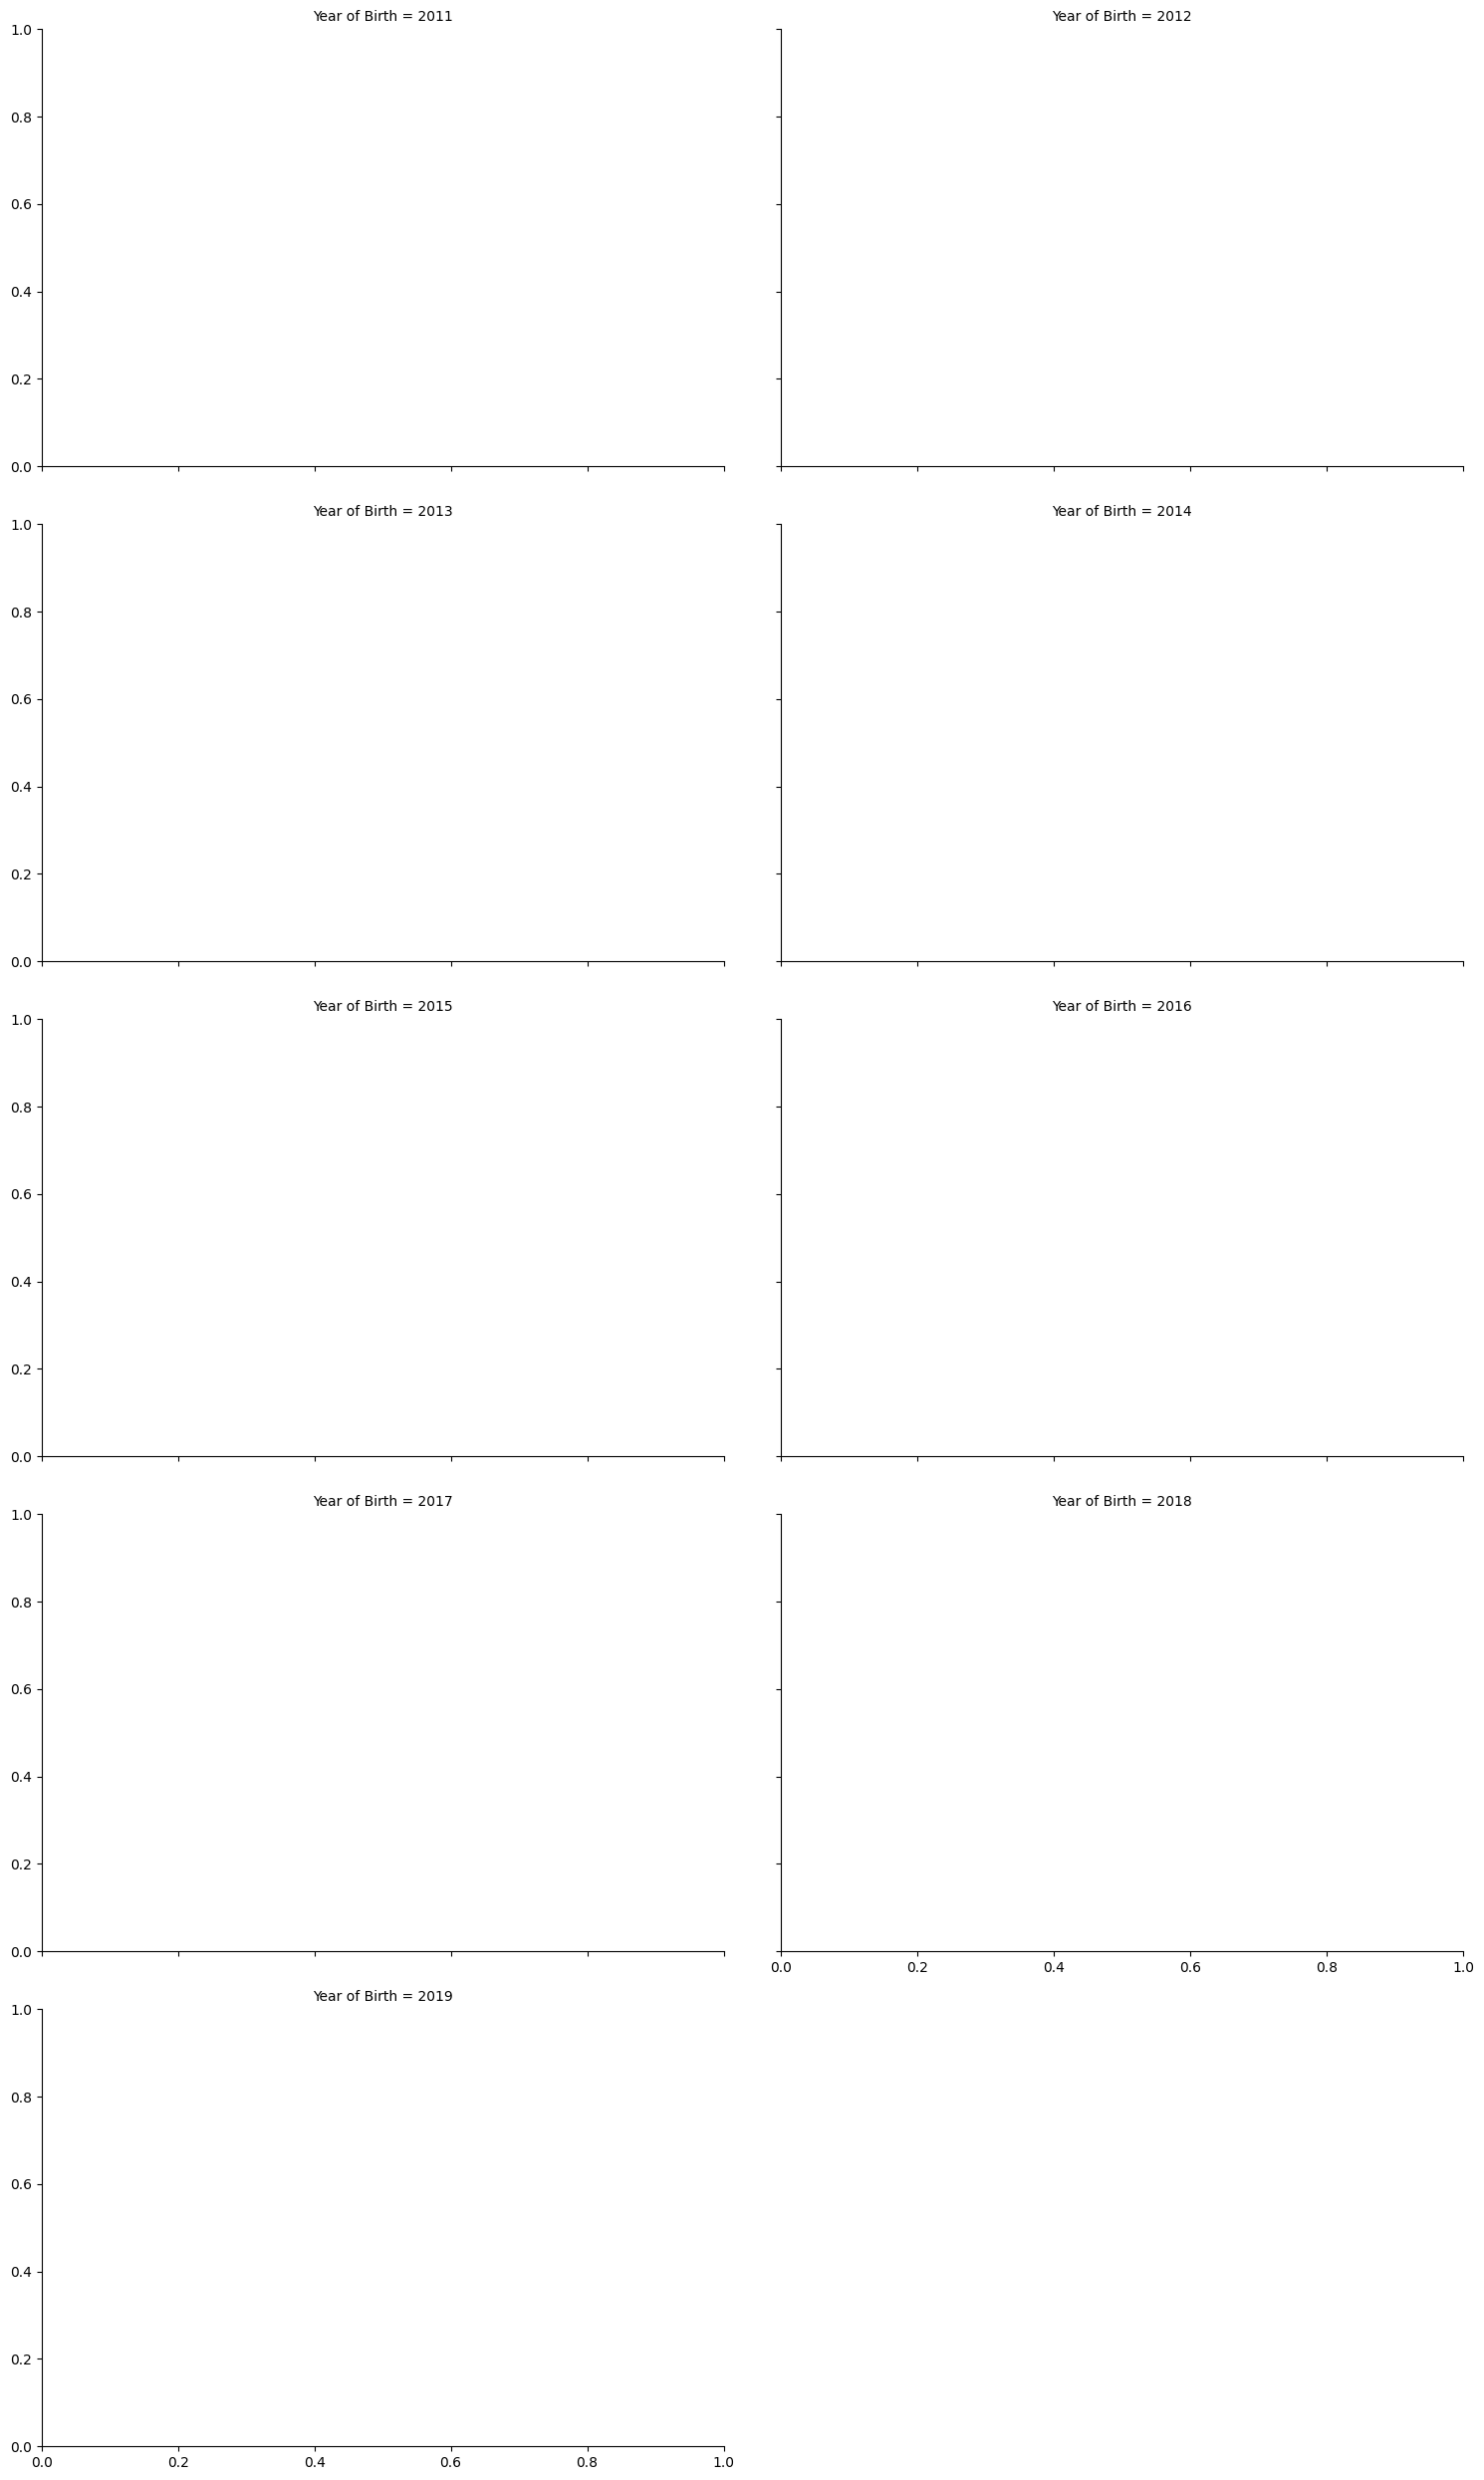

In [20]:
# Creating bar plot with FacetGrid
g = sns.FacetGrid(most_popular_names, col='Year of Birth', col_wrap=2, height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='Ethnicity', y="Child's First Name", hue='Gender', palette='pastel', dodge=True)
g.set_axis_labels('Ethnicity', "Child's First Name")
g.add_legend(title='Gender')
plt.tight_layout()
plt.show()